In [1]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
import pyMELTScalc as M
import multiprocessing
from multiprocessing import Queue
from multiprocessing import Process

sys.path.append('G:/My Drive/2022/MELTS/MELTS_Matlab-master/package')

import time
import random

In [2]:
Exp = pd.read_excel('NeaveExperiments/Neave.xlsx')
Elements = ['SiO2', 'TiO2', 'Al2O3', 'Cr2O3', 'FeOt', 'MnO', 'MgO', 'CaO', 'Na2O', 'K2O', 'P2O5']
Exp[Elements] = 100*Exp.loc[:,Elements].values/Exp.loc[:,'Total'].values.reshape(len(Exp['SiO2']), 1)

In [3]:
bulk = {'SiO2_Liq': Exp['SiO2'][(Exp['Series'] == 'STA') & (Exp['Experiment'] == "synthesis")].values[0], 
        'TiO2_Liq': Exp['TiO2'][(Exp['Series'] == 'STA') & (Exp['Experiment'] == "synthesis")].values[0], 
        'Al2O3_Liq': Exp['Al2O3'][(Exp['Series'] == 'STA') & (Exp['Experiment'] == "synthesis")].values[0], 
        'FeOt_Liq': Exp['FeOt'][(Exp['Series'] == 'STA') & (Exp['Experiment'] == "synthesis")].values[0], 
        'MnO_Liq': Exp['MnO'][(Exp['Series'] == 'STA') & (Exp['Experiment'] == "synthesis")].values[0], 
        'MgO_Liq': Exp['MgO'][(Exp['Series'] == 'STA') & (Exp['Experiment'] == "synthesis")].values[0], 
        'CaO_Liq': Exp['CaO'][(Exp['Series'] == 'STA') & (Exp['Experiment'] == "synthesis")].values[0], 
        'Na2O_Liq': Exp['Na2O'][(Exp['Series'] == 'STA') & (Exp['Experiment'] == "synthesis")].values[0], 
        'K2O_Liq': Exp['K2O'][(Exp['Series'] == 'STA') & (Exp['Experiment'] == "synthesis")].values[0], 
        'P2O5_Liq': Exp['P2O5'][(Exp['Series'] == 'STA') & (Exp['Experiment'] == "synthesis")].values[0], 
        'H2O_Liq': 5, 
        'CO2_Liq': 0.02,
       'Fe3Fet_Liq': 0.16}

In [4]:
P = np.array([1000,3000,6000])
Results = M.multi_iso_crystallise(cores = 20, Model = "MELTSv1.2.0", comp = bulk, 
                         T_start_C = 1260, T_end_C = 1050, dt_C = 2, P_path_bar = P, find_liquidus = True)

  0%|          | 0/1 [00:00<?, ?it/s]

Running MELTSv1.2.0 calculations 0 to 2.0 ... Complete (time taken = 18.32 seconds)


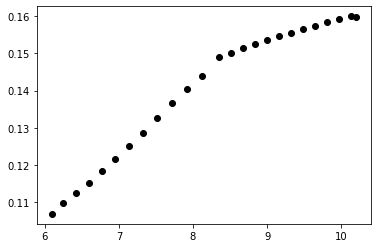

In [5]:
f, a = plt.subplots(1,1)
a.plot(Results['P = 1000 bars']['All']['MgO_Liq'],Results['P = 1000 bars']['All']['Fe3Fet_Liq'], 'ok')

In [6]:
Results = M.multi_iso_crystallise(cores = 20, Model = "MELTSv1.2.0", comp = bulk, 
                         T_start_C = 1260, T_end_C = 1050, dt_C = 2, P_path_bar = P, find_liquidus = True, 
                                  fO2_buffer = "NNO", fO2_offset = -0.3)

  0%|          | 0/1 [00:00<?, ?it/s]

Running MELTSv1.2.0 calculations 0 to 2.0 ... Complete (time taken = 25.6 seconds)


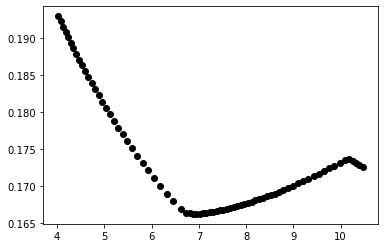

In [7]:
f, a = plt.subplots(1,1)
a.plot(Results['P = 1000 bars']['All']['MgO_Liq'],Results['P = 1000 bars']['All']['Fe3Fet_Liq'], 'ok')

In [8]:
P = np.array([1000,3000])
Results = M.multi_iso_crystallise(cores = 20, Model = "MELTSv1.2.0", comp = bulk, 
                         T_start_C = 1260, T_end_C = 1050, dt_C = 2, P_path_bar = P, find_liquidus = True,
                                  fO2_buffer = "NNO", fO2_offset = -0.3, isochoric = True)

  0%|          | 0/1 [00:00<?, ?it/s]

Running MELTSv1.2.0 calculations 0 to 1.0 ... Complete (time taken = 28.56 seconds)


In [9]:
Results['P = 1000 bars']['All']

,T_C,P_bar,h,s,v,SiO2_Liq,TiO2_Liq,Al2O3_Liq,Cr2O3_Liq,Fe2O3_Liq,...,Na2O_Sp2,K2O_Sp2,P2O5_Sp2,H2O_Sp2,CO2_Sp2,Fe3Fet_Sp2,h_Sp2,mass_Sp2,v_Sp2,rho_Sp2
0,1098.600,1000.000000,-1.220351e+06,294.409234,49.951888,47.679882,1.463814,13.164694,0.0,2.073426,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
1,1096.575,1003.228502,-1.221010e+06,293.917524,49.949242,47.650880,1.470449,13.258299,0.0,2.079723,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
2,1094.550,1009.567840,-1.221895e+06,293.249819,49.946498,47.617488,1.478187,13.405749,0.0,2.087243,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
3,1092.525,1015.759132,-1.222775e+06,292.586465,49.943635,47.588273,1.484384,13.553153,0.0,2.094471,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
4,1090.500,1021.794724,-1.223650e+06,291.927214,49.940797,47.563543,1.488889,13.700486,0.0,2.101392,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
5,1088.475,1027.669537,-1.224520e+06,291.271891,49.938052,47.543616,1.491548,13.847707,0.0,2.107986,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
6,1086.450,1033.379839,-1.225387e+06,290.620388,49.935427,47.528811,1.492209,13.994766,0.0,2.114229,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
7,1084.425,1038.919717,-1.226249e+06,289.972652,49.932988,47.519443,1.490728,14.141614,0.0,2.120097,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
8,1082.400,1044.285246,-1.227107e+06,289.328720,49.930749,47.515811,1.486974,14.288191,0.0,2.125561,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
9,1080.375,1049.471954,-1.227961e+06,288.688707,49.928730,47.518187,1.480837,14.434431,0.0,2.130590,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000


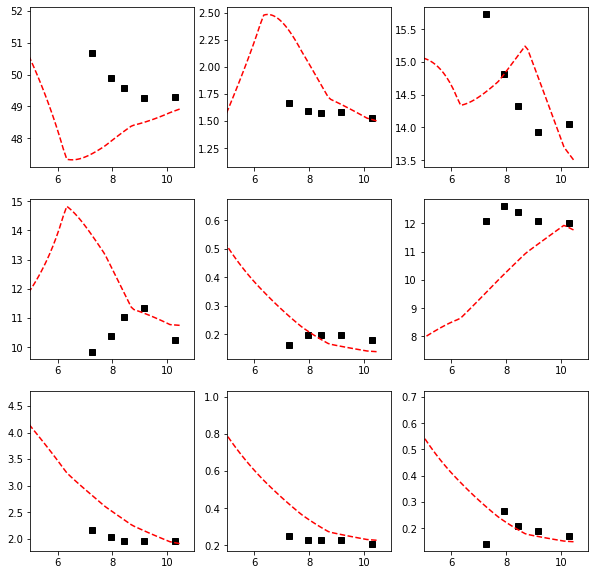

In [5]:
f, a = plt.subplots(3,3, figsize = (10,10))

Pressure = 1000

Elements = [['SiO2', 'TiO2', 'Al2O3'], ['FeOt', 'MnO', 'CaO'], ['Na2O', 'K2O', 'P2O5']]

Results['P = ' + str(Pressure) + ' bars']['liquid1']['FeOt'] = Results['P = ' + str(Pressure) + ' bars']['liquid1']['FeO_Liq']+ Results['P = ' + str(Pressure) + ' bars']['liquid1']['Fe2O3_Liq']*(71.844/(159.69/2))
for i in range(3):
    for j in range(3):
        a[i][j].plot(Exp['MgO'][(Exp['Series'] == "STA") & (Exp['P_MPa'] == Pressure/10)],
                Exp[Elements[i][j]][(Exp['Series'] == "STA") & (Exp['P_MPa'] == Pressure/10)],
                'sk')
        a[i][j].plot(Results['P = ' + str(Pressure) + ' bars']['liquid1']['MgO_Liq'],
                    Results['P = ' + str(Pressure) + ' bars']['liquid1'][Elements[i][j] + '_Liq'],
                    '--r')
        a[i][j].set_xlim([5, 11])

In [14]:
bulk = {'SiO2_Liq': Exp['SiO2'][(Exp['Series'] == 'STA') & (Exp['Experiment'] == "synthesis")].values[0], 
        'TiO2_Liq': Exp['TiO2'][(Exp['Series'] == 'STA') & (Exp['Experiment'] == "synthesis")].values[0], 
        'Al2O3_Liq': Exp['Al2O3'][(Exp['Series'] == 'STA') & (Exp['Experiment'] == "synthesis")].values[0], 
        'Cr2O3_Liq': Exp['Cr2O3'][(Exp['Series'] == 'STA') & (Exp['Experiment'] == "synthesis")].values[0], 
        'FeOt_Liq': Exp['FeOt'][(Exp['Series'] == 'STA') & (Exp['Experiment'] == "synthesis")].values[0],  
        'MgO_Liq': Exp['MgO'][(Exp['Series'] == 'STA') & (Exp['Experiment'] == "synthesis")].values[0], 
        'CaO_Liq': Exp['CaO'][(Exp['Series'] == 'STA') & (Exp['Experiment'] == "synthesis")].values[0], 
        'Na2O_Liq': Exp['Na2O'][(Exp['Series'] == 'STA') & (Exp['Experiment'] == "synthesis")].values[0], 
        'K2O_Liq': Exp['K2O'][(Exp['Series'] == 'STA') & (Exp['Experiment'] == "synthesis")].values[0], 
        'H2O_Liq': 2, 
       'Fe3Fet': 0.15}

In [15]:
Results = M.multi_crystallise(cores = 20, Model = "Holland", comp = bulk, 
                         T_start_C = 1260.0, T_end_C = 1050.0, dt_C = 2, P_bar = P, find_liquidus = True)

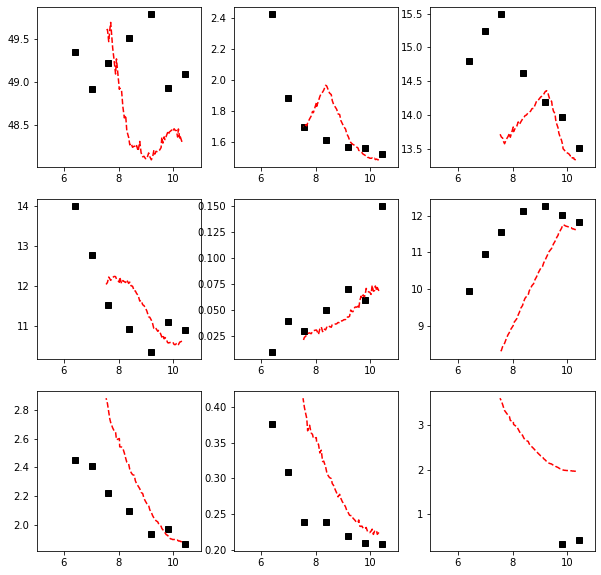

In [17]:
f, a = plt.subplots(3,3, figsize = (10,10))

Pressure = 3000

Elements = [['SiO2', 'TiO2', 'Al2O3'], ['FeOt', 'Cr2O3', 'CaO'], ['Na2O', 'K2O', 'H2O']]

Results['P = ' + str(Pressure) + ' bars']['liq']['FeOt'] = Results['P = ' + str(Pressure) + ' bars']['liq']['FeO']
for i in range(3):
    for j in range(3):
        a[i][j].plot(Exp['MgO'][(Exp['Series'] == "STA") & (Exp['P_MPa'] == Pressure/10)],
                Exp[Elements[i][j]][(Exp['Series'] == "STA") & (Exp['P_MPa'] == Pressure/10)],
                'sk')
        a[i][j].plot(Results['P = ' + str(Pressure) + ' bars']['liq']['MgO']*100,
                    Results['P = ' + str(Pressure) + ' bars']['liq'][Elements[i][j]]*100,
                    '--r')
        a[i][j].set_xlim([5, 11])